## IDEA:
### Suscribers are less likely than Customers to pay extra time fees per ride
Suscriber = people enrolled with a 1 year contract to use Citibike

Customer = people that buy a Day-pass or a 3-Day-pass to use Citibike, normally associated wih tourists.

Note: the limit usage time without extra charges is different for Suscribers and Customers

Max time for Customers = 30min = 1800 seg  

Max time for Suscribers = 45min = 2700 seg

## NULL HYPOTHESIS:
The ratio of Suscribers rides paying extra fees over the total Suscribers rides is the same or higher than the ratio of Customers rides paying extra fees over the total Customers rides


$$
H_0:\frac{E_{subscriber}}{N_{subscriber}}>=\frac{E_{customer}}{N_{customer}}
$$

$$
H_1:\frac{E_{subscriber}}{N_{subscriber}}<\frac{E_{customer}}{N_{customer}}
$$

or identically:

$$
H_0:\frac{E_{customer}}{N_{customer}}-\frac{E_{subscriber}}{N_{subscriber}}<=0
$$

$$
H_1:\frac{E_{customer}}{N_{customer}}-\frac{E_{subscriber}}{N_{subscriber}}>0
$$




## I will use a significance level $\alpha=0.05$



In [119]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [120]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [121]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [122]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
#df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [123]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [124]:
df.drop(['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis = 1, inplace = True)

In [125]:
df.head()
df = df.dropna() 

In [126]:
#df[df['usertype']=='Customer' & df['tripduration']>=1800]

#df[df['tripduration']>=1800]

#df[(df['tripduration']>=1800) & (df['usertype']=='Subscriber')].head()

In [127]:
#Max time for Customers = 30min = 1800 seg
#Max time for Suscribers = 45min = 2700 seg
Customer = 1800
Subscriber = 2700
#df[df['usertype']=='Customer' & df['tripduration']>=1800]

#df[df['tripduration']>=1800]

In [128]:
#df[(df['tripduration']>=1800) & (df['usertype']=='Customer')]

In [129]:
df['Extra Charge'] = ((df['tripduration'] >= Customer) & (df['usertype'] == 'Customer') ) | \
                    (df['tripduration'] >= Subscriber) & (df['usertype'] == 'Subscriber')
df.head()

,tripduration,starttime,usertype,Extra Charge
0,923,1/1/2016 00:00:41,Subscriber,False
1,379,1/1/2016 00:00:45,Subscriber,False
2,589,1/1/2016 00:00:48,Subscriber,False
3,889,1/1/2016 00:01:06,Subscriber,False
4,1480,1/1/2016 00:01:12,Subscriber,False


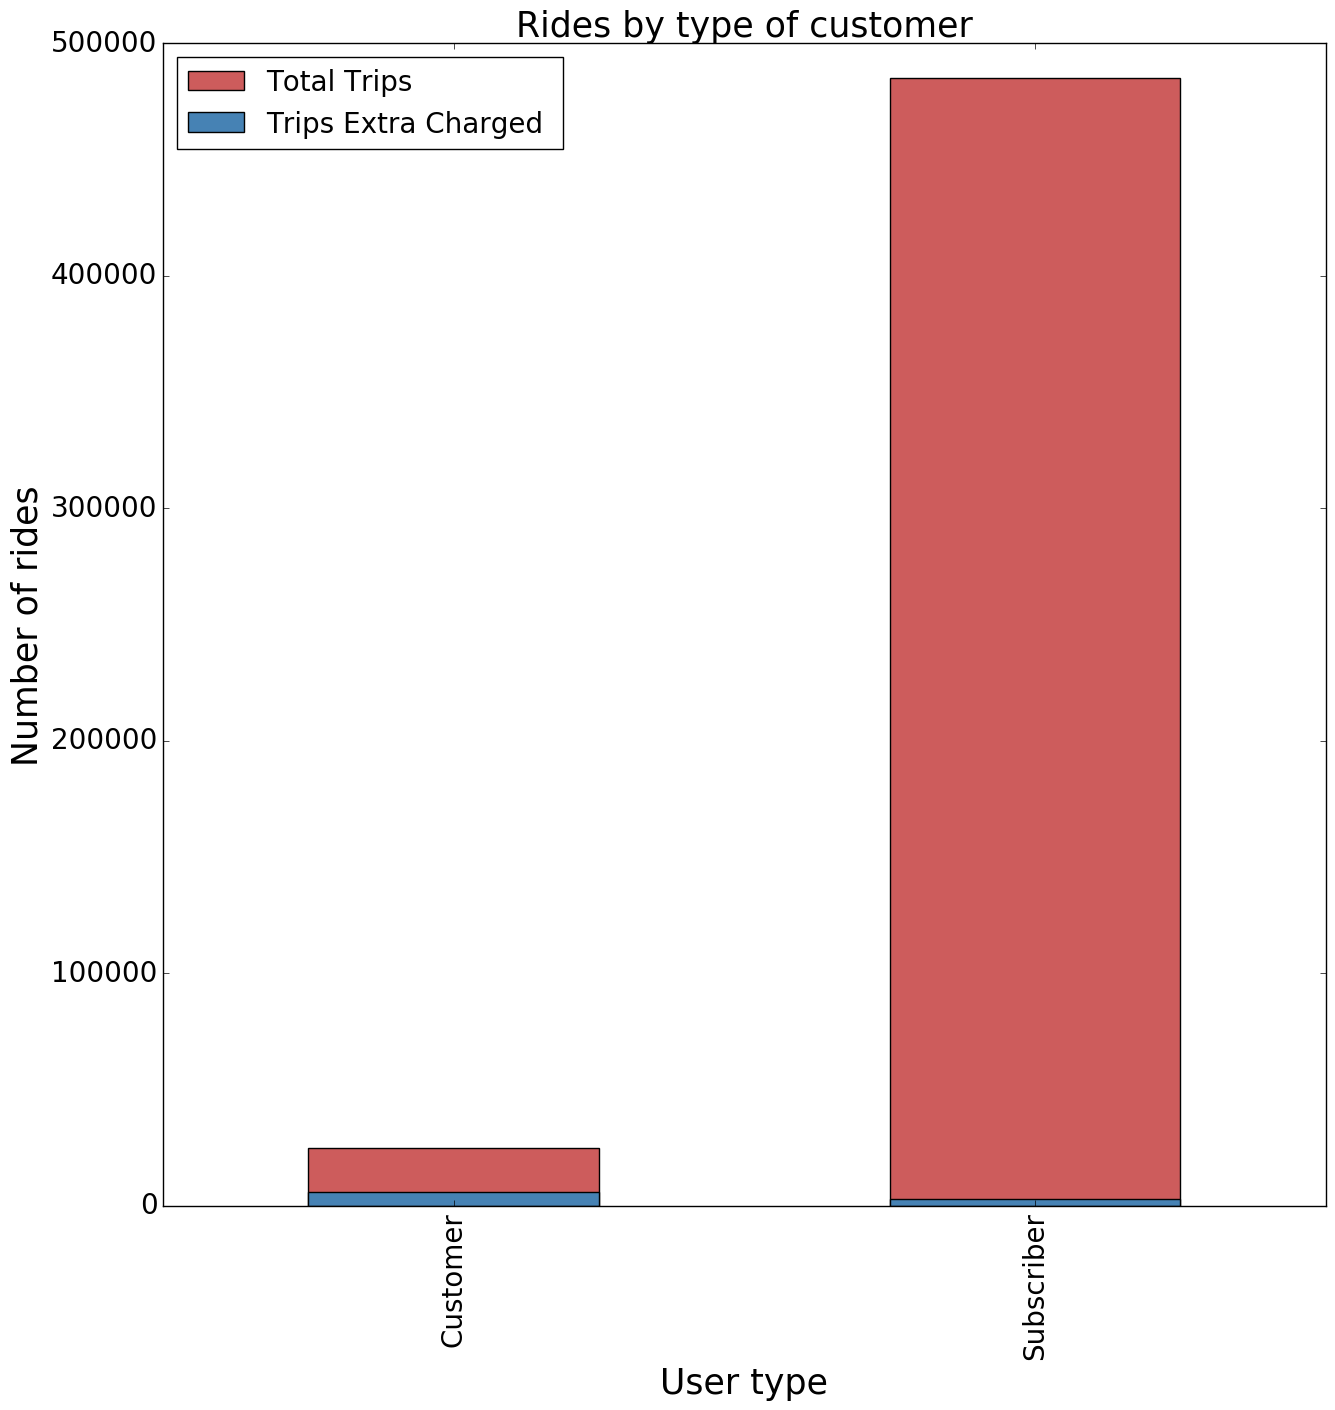

In [144]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas

ax = df['tripduration'].groupby([df['usertype']]).count().plot(kind = "bar", color = 'IndianRed',\
                                                             label = 'Total Trips', fontsize = 20)

ax = df['tripduration'][df['Extra Charge'] == True].groupby([df['usertype']]).count().plot(kind = "bar",\
                                            color = 'SteelBlue', label = 'Trips Extra Charged ', fontsize = 20)
ax.set_ylabel ("Number of rides", fontsize = 25)
ax.set_xlabel ("User type",fontsize = 25)     
ax.set_title('Rides by type of customer', fontsize = 25)
                
pl.legend(loc = 2, fontsize = 20)

In [131]:
totaltrips = len(df[(df['usertype'] == 'Subscriber') | (df['usertype'] == 'Customer')])

In [132]:
totaltrips

509478

In [133]:
totalCustomer = len(df[(df['usertype'] == 'Customer')])

In [134]:
totalCustomer

24543

In [135]:
totalSubscriber = len(df[(df['usertype'] == 'Subscriber')])

In [136]:
totalSubscriber

484935

In [137]:
ExtraCustomer = len(df[(df['Extra Charge'] == True) & (df['usertype'] == 'Customer')])

In [138]:
ExtraSubscriber=len(df[(df['Extra Charge'] == True) & (df['usertype'] == 'Subscriber')])

In [139]:
ratioSubscriber = ExtraSubscriber / totalSubscriber
ratioCustomer = ExtraCustomer / totalCustomer

In [140]:
print('Ratio of Customers Charged Extra: ', ratioCustomer*100,\
      '%     Ratio of Subscribers Charged Extra: ', ratioSubscriber*100, '%')

Ratio of Customers Charged Extra:  23.4201197898 %     Ratio of Subscribers Charged Extra:  0.577809397136 %
